In [5]:
import numpy as np
import rasterio
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
folder_path = Path("/content/drive/My Drive/USGS/Bands-folder")

In [8]:
dn_image_array = []

In [9]:
for filepath in folder_path.iterdir():
    if filepath.is_file():
        print(filepath)
        with rasterio.open(filepath) as src:
            dn_image = src.read(1).astype(float)
            no_data_value = src.nodata
            if no_data_value is not None:
                dn_image = np.ma.masked_equal(dn_image, no_data_value)
                dn_image_array.append(dn_image)

/content/drive/My Drive/USGS/Bands-folder/LC09_L2SP_111014_20220914_20230329_02_T1_SR_B1.TIF
/content/drive/My Drive/USGS/Bands-folder/LC09_L2SP_111014_20220914_20230329_02_T1_SR_B2.TIF
/content/drive/My Drive/USGS/Bands-folder/LC09_L2SP_111014_20220914_20230329_02_T1_SR_B3.TIF
/content/drive/My Drive/USGS/Bands-folder/LC09_L2SP_111014_20220914_20230329_02_T1_SR_B4.TIF
/content/drive/My Drive/USGS/Bands-folder/LC09_L2SP_111014_20220914_20230329_02_T1_SR_B5.TIF
/content/drive/My Drive/USGS/Bands-folder/LC09_L2SP_111014_20220914_20230329_02_T1_SR_B6.TIF
/content/drive/My Drive/USGS/Bands-folder/LC09_L2SP_111014_20220914_20230329_02_T1_SR_B7.TIF


In [10]:
# metadata
REFLECTANCE_MULT_BAND_1 = 2.75e-05
REFLECTANCE_MULT_BAND_2 = 2.75e-05
REFLECTANCE_MULT_BAND_3 = 2.75e-05
REFLECTANCE_MULT_BAND_4 = 2.75e-05
REFLECTANCE_MULT_BAND_5 = 2.75e-05
REFLECTANCE_MULT_BAND_6 = 2.75e-05
REFLECTANCE_MULT_BAND_7 = 2.75e-05
REFLECTANCE_ADD_BAND_1 = -0.2
REFLECTANCE_ADD_BAND_2 = -0.2
REFLECTANCE_ADD_BAND_3 = -0.2
REFLECTANCE_ADD_BAND_4 = -0.2
REFLECTANCE_ADD_BAND_5 = -0.2
REFLECTANCE_ADD_BAND_6 = -0.2
REFLECTANCE_ADD_BAND_7 = -0.2

In [11]:
SUN_ELEVATION = 27.66727375
angle_degrees = 90.0 - SUN_ELEVATION
angle_radians = (np.deg2rad(angle_degrees))

In [12]:
reflectance_arr_dn = []
for dn_image in dn_image_array:
    reflectance_dn = (REFLECTANCE_MULT_BAND_1 * dn_image + REFLECTANCE_ADD_BAND_1) / (np.sin(angle_radians))
    reflectance_dn[reflectance_dn < 0] = np.nan
    reflectance_arr_dn.append(reflectance_dn)

In [18]:
fig, axes = plt.subplots(7, 1, figsize=(30, 50))

i = 0
band = 0
for ref in reflectance_arr_dn:
    if band == 8:
      break
    axes[i].imshow(ref, cmap="gray")
    axes[i].set_title(f"Band {band+1} surface Reflectance image")
    axes[i].axis('off')

    i += 1
    band += 1

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [14]:
dn_image_cropped_array = []
for dn_image in dn_image_array:
    dn_image_cropped = dn_image[2500:3500, 4500:6000]
    dn_image_cropped_array.append(dn_image_cropped)

In [15]:
reflectance_arr_cropped = []
for dn_image_cr in dn_image_cropped_array:
    reflectance_cr = (REFLECTANCE_MULT_BAND_1 * dn_image_cr + REFLECTANCE_ADD_BAND_1) / (np.sin(angle_radians))
    reflectance_cr[reflectance_cr < 0] = np.nan
    reflectance_arr_cropped.append(reflectance_cr)

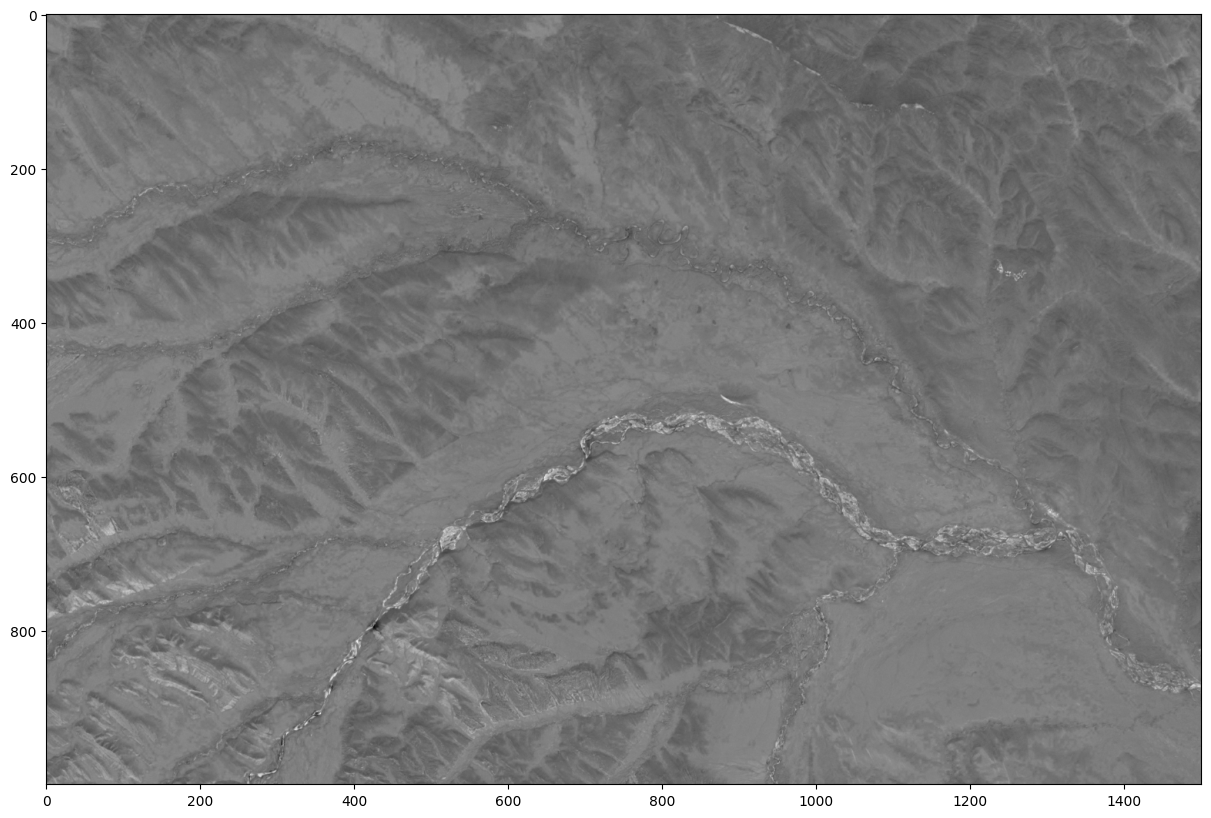

In [16]:
fig, axis = plt.subplots(1, 1, figsize=(20,10))
axis.imshow(dn_image_array[0][2500:3500, 4500:6000], cmap="gray")

In [17]:
fig, axes = plt.subplots(7, 1, figsize=(30, 50))

i = 0
band = 0
for ref in reflectance_arr_cropped:
    if band == 8:
      break
    axes[i].imshow(ref, cmap="gray")
    axes[i].set_title(f"Band {band+1} surface Reflectance image")
    axes[i].axis('off')

    i += 1
    band += 1

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.